In [14]:
first = '/home/saka/Documents/Lab stuff/confocal/exp2/results_bacteria.csv'
second = '/home/saka/Documents/Lab stuff/confocal/exp2/exporttracks-1.csv'

In [ ]:
import matplotlib.pyplot as plt
pairwise = xref_locations('/home/saka/Documents/Lab stuff/confocal/exp2/results_bacteria.csv',
                          '/home/saka/Documents/Lab stuff/confocal/exp2/exporttracks-1.csv',
                          first_x='X', first_y='Y', first_z='Slice',
                          second_x='POSITION_X', second_y='POSITION_Y',
                          second_z='POSITION_Z', verbose=False)
pairwise.head()
pairwise.shape
area_box = pairwise.boxplot(column='Area')
area_box.plot()
plt.show()

In [2]:
import pandas
import geopandas
from math import isnan

def xref_locations(first, second, first_x='X', first_y='Y', first_z='Slice',
                   second_x='POSITION_X', second_y='POSITION_Y', second_z='POSITION_Z',
                   max_dist=10, verbose=False):
    pairwise_elements = pandas.DataFrame()
    first_measurements = pandas.read_csv(first)
    second_measurements = pandas.read_csv(second)
    
    # Convert columns to numeric values
    first_measurements[first_x] = pandas.to_numeric(first_measurements[first_x], errors='coerce')
    first_measurements[first_y] = pandas.to_numeric(first_measurements[first_y], errors='coerce')
    first_measurements[first_z] = pandas.to_numeric(first_measurements[first_z], errors='coerce')
    
    second_measurements[second_x] = pandas.to_numeric(second_measurements[second_x], errors='coerce')
    second_measurements[second_y] = pandas.to_numeric(second_measurements[second_y], errors='coerce')
    second_measurements[second_z] = pandas.to_numeric(second_measurements[second_z], errors='coerce')

    first_gdf = geopandas.GeoDataFrame(
        first_measurements,
        geometry=geopandas.points_from_xy(first_measurements[first_x],
                                    first_measurements[first_y],
                                    first_measurements[first_z]))
    second_gdf = geopandas.GeoDataFrame(
        second_measurements,
        geometry=geopandas.points_from_xy(second_measurements[second_x],
                                    second_measurements[second_y],
                                    second_measurements[second_z]))
    ti_rows = first_gdf.shape[0]
    tj_rows = second_gdf.shape[0]
    for ti_row in range(0, ti_rows):
        if verbose:
            print(f"On row: {ti_row}")
        ti_element = first_gdf.iloc[[ti_row, ]]
        titj = geopandas.sjoin_nearest(ti_element, second_gdf,
                                 distance_col="pairwise_dist",
                                 max_distance=max_dist)
        chosen_closest_dist = titj.pairwise_dist.min()
        if (isnan(chosen_closest_dist)):
            print(f"This element has no neighbor within {max_dist}.")
        else:
            chosen_closest_cell = titj.pairwise_dist == chosen_closest_dist
            chosen_closest_row = titj[chosen_closest_cell]
            pairwise_tmp = pandas.concat([pairwise_elements, chosen_closest_row])
            pairwise_elements = pairwise_tmp
    return pairwise_elements




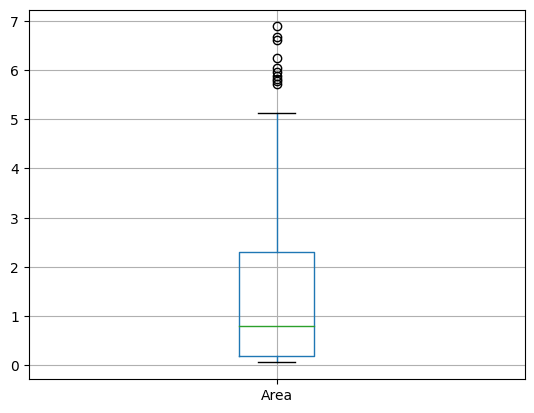

In [5]:
import matplotlib.pyplot as plt
# Define your input CSV file paths
first_csv_path = '/home/saka/Documents/Lab stuff/confocal/exp2/results_bacteria.csv'
second_csv_path = '/home/saka/Documents/Lab stuff/confocal/exp2/exporttracks-1.csv'

# Call the xref_locations function
pairwise = xref_locations(first=first_csv_path,
                        second=second_csv_path,
                        first_x='X', first_y='Y', first_z='Slice',
                        second_x='POSITION_X', second_y='POSITION_Y', second_z='POSITION_Z',
                        max_dist=10, verbose=False)

# Display the resulting pairwise_elements DataFrame
#print(result)
pairwise.head()
pairwise.shape
area_box = pairwise.boxplot(column='Area')
area_box.plot()
plt.show()